In [1]:
#? load dependancies
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#? define constants
SAMPLES_PER_CATEGORY = 3000

EMNIST_PATH        = 'D:/Datasets/A-Z Handwritten Alphabet/A_Z Handwritten Data.csv'
# EMNIST_LABLES_PATH = 'D:/Datasets/EMNIST/emnist-letters-mapping.txt'
MNIST_PATH         = 'D:/Datasets/EMNIST/emnist-mnist-train.csv'
# MNIST_LABLES_PATH  = 'D:/Datasets/EMNIST/emnist-mnist-mapping.txt'
MATH_PATH          = 'D:/Datasets/Mathematical Symbols/'
# MATH_LABLES_PATH   = 'D:/Datasets/Mathematical Symbols/symbols-mappings.txt'

(372450, 32, 32)
(372450,)
[13869  8668 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586
 12336 19010 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272
 10859  6076]


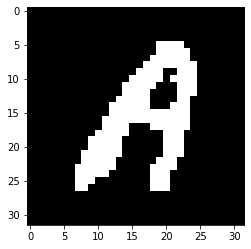

In [3]:
#? load EMNIST data
emnist_raw = pd.read_csv(EMNIST_PATH)

# loop over each letter category
emnist_images  = []
emnist_lables  = []
emnist_weights = []
for i in range(26):

    # get all of the images for this category
    img_letters = np.asarray(emnist_raw[emnist_raw['0'] == i])[:, 1:]

    # convert the array into the 2d image format of tye float32
    img_reshaped = img_letters.reshape((-1, 28, 28)).astype('float32')

    # resize the array from (28x28) to (32x32)
    img_resized = [cv2.resize(image, (32, 32)) for image in img_reshaped]

    # binarize the image
    img_binarized = []
    for img in img_resized:
        ret, i_b = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        img_binarized.append(i_b)

    img_binarized = np.asarray(img_binarized)

    # normalize the image
    img_images = img_binarized / 255

    # update the lists to contain the new infromation
    count = img_letters.shape[0]

    emnist_images.append(img_images)
    emnist_lables.append([i] * count)
    emnist_weights.append(count)

emnist_images = [item for sublist in emnist_images for item in sublist]
emnist_images = np.asarray(emnist_images)
emnist_lables = [item for sublist in emnist_lables for item in sublist]
emnist_lables = np.asarray(emnist_lables)
emnist_weights = np.asarray(emnist_weights)

print(emnist_images.shape)
print(emnist_lables.shape)
print(emnist_weights)

plt.imshow(emnist_images[0], 'gray')
plt.show()

(59999, 32, 32)
(59999,)
[6000 6000 6000 6000 5999 6000 6000 6000 6000 6000]


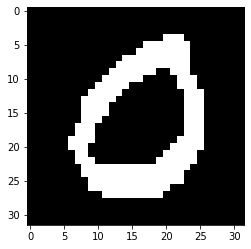

In [4]:
#? load MNIST data
mnist_raw = pd.read_csv(MNIST_PATH)

# loop over each letter category
mnist_images  = []
mnist_lables  = []
mnist_weights = []
for i in range(10):

    # get all of the images for this category
    img_letters = np.asarray(mnist_raw[mnist_raw['4'] == i])[:, 1:]

    # convert the array into the 2d image format of tye float32
    img_reshaped = img_letters.reshape((-1, 28, 28)).astype('float32')

    # resize the array from (28x28) to (32x32)
    img_resized = [cv2.resize(image, (32, 32)) for image in img_reshaped]

    # binarize the image
    img_binarized = []
    for img in img_resized:
        ret, i_b = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        img_binarized.append(i_b)

    img_binarized = np.asarray(img_binarized)

    # correct the rotation of the images
    img_rotated = np.rot90(img_binarized, k=1, axes=(1, 2))
    img_fliped  = np.flip(img_rotated, axis=1)

    # normalize the image
    img_images = img_fliped / 255

    # update the lists to contain the new infromation
    count = img_letters.shape[0]

    mnist_images.append(img_images)
    mnist_lables.append([i] * count)
    mnist_weights.append(count)

mnist_images = [item for sublist in mnist_images for item in sublist]
mnist_images = np.asarray(mnist_images)
mnist_lables = [item for sublist in mnist_lables for item in sublist]
mnist_lables = np.asarray(mnist_lables)
mnist_weights = np.asarray(mnist_weights)

print(mnist_images.shape)
print(mnist_lables.shape)
print(mnist_weights)

plt.imshow(mnist_images[0], 'gray')
plt.show()

(68017, 32, 32)
(68017,)
[25112 33997  8908]


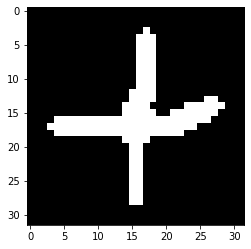

In [5]:
#? load Math symbols data
math_raw = []
math_lables = []
math_weights = []

# grab the first [SAMPLES_PER_CATEGORY] images from each of the directories
i = 0
for d in os.listdir(MATH_PATH):
    path = os.path.join(MATH_PATH, d)

    # make sure the path is pointing at a directory
    if os.path.isdir(path):
        math_weights.append(0)
        i += 1

        # get the first [SAMPLES_PER_CATEGORY] images
        j = 0
        for img in os.listdir(path):
            img_data = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

            # image processing
            img_inverted = cv2.bitwise_not(img_data)
            mask = np.ones((5,5),np.uint8)
            img_thickened = cv2.dilate(img_inverted, mask, iterations=1)
            img_resized = cv2.resize(img_thickened, (26, 26))
            img_padded = cv2.copyMakeBorder(img_resized, 3, 3, 3, 3, cv2.BORDER_CONSTANT)
            img_blured = cv2.blur(img_padded, (3, 3))
            ret, img_binarized = cv2.threshold(img_blured, 127, 255, cv2.THRESH_BINARY)

            math_raw.append(img_binarized)

            math_weights[i-1] += 1
            math_lables.append(i)

            if i > 10000:
                break

# convert the arrays into numpy format
math_images = np.asarray(math_raw).reshape((-1, 32, 32))
math_lables = np.asarray(math_lables).reshape((-1))
math_weights = np.asarray(math_weights)

# normalize the images
math_images = math_images / 255

print(math_images.shape)
print(math_lables.shape)
print(math_weights)

plt.imshow(math_images[0], 'gray')
plt.show()

(500466, 32, 32)
(500466,)
(39,)


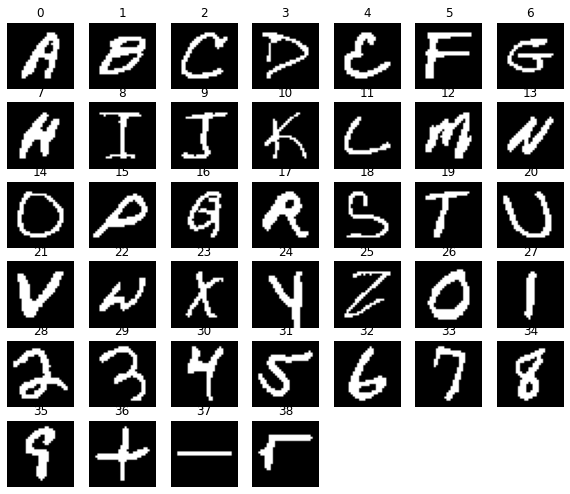

In [6]:
#? combine all data and save it
images  = np.concatenate((emnist_images, mnist_images, math_images))
lables  = np.concatenate((emnist_lables, mnist_lables + 26, math_lables + 35))
weights = np.concatenate((emnist_weights, mnist_weights, math_weights))

np.save('Xs.npy', images)
np.save('ys.npy', lables)
np.save('weights.npy', weights)

print(images.shape)
print(lables.shape)
print(weights.shape)

fig = plt.figure(figsize=(10, 10))

for i in range(39):
    fig.add_subplot(7, 7, i+1)
    plt.axis('off')
    plt.title(lables[weights[:i].sum()])
    plt.imshow(images[weights[:i].sum()], 'gray')
    plt.clim(0, 1)

plt.show()